# Assignment 6

# Task 1

In [67]:
import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from tabulate import tabulate

In [68]:
# Loading file
filename = 'nutrients.csv'
data = pd.read_csv(filename, header=None, names=[
                   'nutrient', 'food'])

# Creating a graph from the DataFrame
graph = nx.from_pandas_edgelist(data, source='nutrient', target='food')

In [69]:
# Calculating Degree Centrality for each node in the graph
deg_centrality = nx.degree_centrality(graph)

# Making table so i can use tabulate module
deg_centrality_table = []
for node, centrality in deg_centrality.items():
    # Capitalizing first letters in nodes
    row = [node.capitalize(), centrality]
    deg_centrality_table.append(row)

# Using tabulate to get an overview
print('Degree:')
print('-----------------------------------')
print(tabulate(deg_centrality_table, headers=['Node', 'Centrality'], tablefmt='orgtbl'))
print('-----------------------------------\n')

Degree:
-----------------------------------
| Node             |   Centrality |
|------------------+--------------|
| A                |        0.175 |
| Carrots          |        0.05  |
| Eggs             |        0.075 |
| Fatty fish       |        0.125 |
| Green leafy vegs |        0.15  |
| Liver            |        0.15  |
| Milk             |        0.125 |
| Tomatoes         |        0.1   |
| B12              |        0.125 |
| B6               |        0.2   |
| Asparagus        |        0.05  |
| Beans            |        0.075 |
| Kidneys          |        0.1   |
| Potatoes         |        0.075 |
| C                |        0.125 |
| Pumpkins         |        0.025 |
| Ca               |        0.125 |
| Broccoli         |        0.05  |
| Cheese           |        0.025 |
| Cu               |        0.175 |
| Nuts             |        0.125 |
| Whole grains     |        0.1   |
| D                |        0.075 |
| Mushrooms        |        0.025 |
| E                |

In [70]:
# Calculate Eigenvector Centrality for each node in the graph
eigen_centrality = nx.eigenvector_centrality(graph)

# Making table so i can use tabulate module
eigen_centrality_table = []
for node, centrality in eigen_centrality.items():
    # Capitalizing first letters in nodes
    row = [node.capitalize(), centrality]
    eigen_centrality_table.append(row)

# Using tabulate to get an overview
print('Eigenvector:')
print('-----------------------------------')
print(tabulate(eigen_centrality_table, headers=['Node', 'Centrality'], tablefmt='orgtbl'))
print('-----------------------------------\n')

Eigenvector:
-----------------------------------
| Node             |   Centrality |
|------------------+--------------|
| A                |    0.220411  |
| Carrots          |    0.0609924 |
| Eggs             |    0.117061  |
| Fatty fish       |    0.210022  |
| Green leafy vegs |    0.160204  |
| Liver            |    0.281258  |
| Milk             |    0.149709  |
| Tomatoes         |    0.0770751 |
| B12              |    0.187312  |
| B6               |    0.334604  |
| Asparagus        |    0.0865596 |
| Beans            |    0.193173  |
| Kidneys          |    0.218525  |
| Potatoes         |    0.193173  |
| C                |    0.0718939 |
| Pumpkins         |    0.0150016 |
| Ca               |    0.0779833 |
| Broccoli         |    0.0312738 |
| Cheese           |    0.0162722 |
| Cu               |    0.274018  |
| Nuts             |    0.213065  |
| Whole grains     |    0.131536  |
| D                |    0.0784779 |
| Mushrooms        |    0.0163752 |
| E            

In [71]:
# Detecting communities in the graph using Louvain method
partition = community_louvain.best_partition(graph)

# Printing communities found
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node.capitalize())

community_table = [[f'Community {community_id}', ', '.join(nodes)] for community_id, nodes in communities.items()]

print('Communities (Louvain method):')
print('--------------------------------------------------------------------------------------------------------------------|')
print(tabulate(community_table, headers=['Community ID', 'Nodes'], tablefmt='orgtbl'))
print('--------------------------------------------------------------------------------------------------------------------|\n')

Communities (Louvain method):
--------------------------------------------------------------------------------------------------------------------|
| Community ID   | Nodes                                                                                            |
|----------------+--------------------------------------------------------------------------------------------------|
| Community 1    | A, Carrots, Eggs, Fatty fish, Milk, B12, D, Mushrooms, Legumes, Beef, Riboflavin                 |
| Community 2    | Green leafy vegs, Nuts, Whole grains, E, Seeds, Mn, Wheat, Niacin, Thiamin, Veg oils             |
| Community 3    | Liver, B6, Asparagus, Beans, Kidneys, Potatoes, Cu, Se, Zn, Folates, Spinach, Poultry, Shellfish |
| Community 0    | Tomatoes, C, Pumpkins, Ca, Broccoli, Cheese, Yogurt                                              |
--------------------------------------------------------------------------------------------------------------------|



Graph:


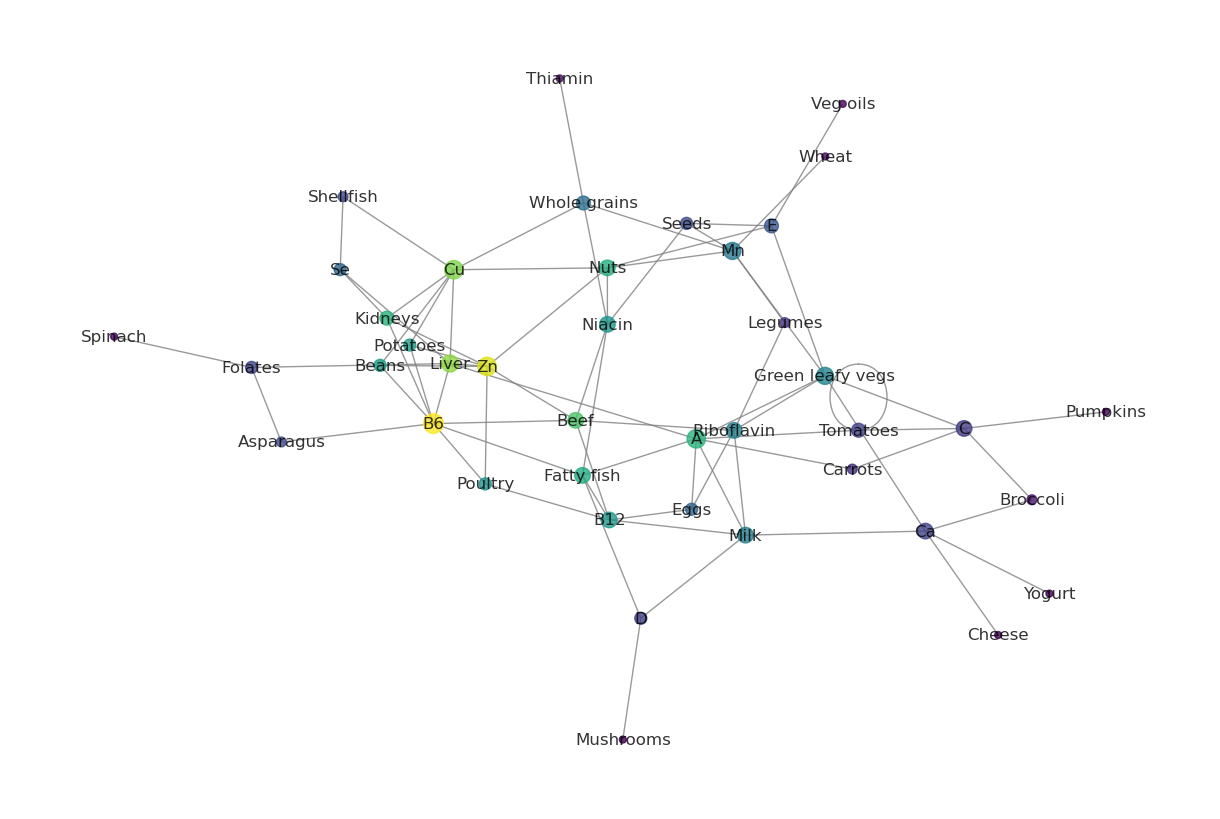

In [72]:
print('Graph:')

# Visualize the graph and communities using the spring layout (Fruchterman-Reingold layout)
positions = nx.spring_layout(graph)

# Create a dictionary that maps lowercase labels to capitalize labels
capitalized_labels = {node: node.capitalize() for node in graph.nodes()}

plt.figure(figsize=(12, 8))

# Draw the graph with the updated labels
nx.draw(graph, positions, node_color=colors, node_size=sizes, cmap=plt.get_cmap(
    'viridis'), alpha=0.8, with_labels=True, font_size=12, edge_color='gray', labels=capitalized_labels)

plt.axis('off')
plt.show()